# Проект: Линейные модели в машинном обучении

# Описание проекта:

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма». 
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье

# Предоставленные данные
1. `ferma_main.csv` содержит данные о стаде фермера на текущий момент.
2. `ferma_dad.csv`хранит имя папы каждой коровы в стаде фермера. 
3. `cow_buy.csv` это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. 

# План проекта:

**1. Загрузите и изучите данные**

Загрузить данные в датафреймы `pandas`

**2. Предобработка данных**

Проверьте данные на наличие пропусков и дубликатов. Узнайте, корректны ли типы данных у каждого признака. При необходимости устраните все проблемы с данными.

**3. Исследовательский анализ данных**

Необхадимо провести статистический анализ всех признаков, а также нужно построить графики для всех признаков

**4. Проведите корреляционный анализ признаков в датасете `ferma_main.csv`**
Провести корреляционный анализ данных, при нахождении мультиколлинеарности устранить необхадимые признаки
**5. Построить ммодель для задачи регресии**

Построить три регресионные модели и с помощью лучшей определить удой коров

**6. Построить ммодель для задачи классификации**

Проанализировать работу логистической регресии и спрогнозировать вкус молока

**7. Вывод**

## Шаг 1. Загрузка данных

1. Загрузите данные в датафреймы pandas.

In [1]:
!pip install phik -q
!pip install --upgrade scikit-learn -q
import phik
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
import scipy.stats as st
from scipy.stats import binom, norm
import numpy as np
from sklearn.preprocessing import LabelEncoder
RANDOM_STATE = 7

In [2]:
df_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
df_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')
display(df_main, df_dad, df_buy)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


***Вывод:***

Файл о стаде фермера на текущий момент, больше файла с именами папы каждой коровы на 5 строк. Видно то, что последние 5 строк в файле о стаде фермера на текущий момент содержат явные дубликаты.

***2. Изучите данные. Определите, соответствуют ли они описанию задачи и изученным в прошлых спринтах стандартам оформления данных. При необходимости переименуйте столбцы.***

In [3]:
df_main.columns = df_main.columns.str.lower()
df_main.columns = ['id', 'удой_кг', 'эке', 'сырой_протеин_г', 'спо',
                   'порода', 'тип_пастбища', 'порода_папы_быка', 'жирность_процент', 'белок_процент', 'вкус_молока', 'возраст']
df_dad.columns = ['id', 'имя_папы_быка']
df_buy.columns = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы_быка',
                  'текущая_жирность_процент', 'текущий_уровень_белка_процент', 'возраст']
display(df_main.head(1), df_dad.head(1), df_buy.head(1))

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_процент,белок_процент,вкус_молока,возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет


,id,имя_папы_быка
0,1,Буйный


,порода,тип_пастбища,порода_папы_быка,имя_папы_быка,текущая_жирность_процент,текущий_уровень_белка_процент,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет


***Вывод:***

Столбцы были записанны не в змеинном регистре, начинались с больших букв, а также были знаки пробела и запятых, тем самым проще было переименовать полноостью все столбцы

##  Шаг 2. Предобработка данных

Проверьте данные на наличие пропусков и дубликатов. Узнайте, корректны ли типы данных у каждого признака. При необходимости устраните все проблемы с данными.

In [4]:
# данные о стаде фермера на текущий момент
df_main.info()
df_main.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                634 non-null    int64 
 1   удой_кг           634 non-null    int64 
 2   эке               634 non-null    object
 3   сырой_протеин_г   634 non-null    int64 
 4   спо               634 non-null    object
 5   порода            634 non-null    object
 6   тип_пастбища      634 non-null    object
 7   порода_папы_быка  634 non-null    object
 8   жирность_процент  634 non-null    object
 9   белок_процент     634 non-null    object
 10  вкус_молока       634 non-null    object
 11  возраст           634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_процент,белок_процент,вкус_молока,возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет


In [5]:
# Заменим тип данных
try:
    for _ in ['эке', 'спо', 'жирность_процент', 'белок_процент']:
        df_main[_] = df_main[_].str.replace(',', '.')
        df_main[_] = pd.to_numeric(df_main[_])
except:
    pass

print(df_main.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                634 non-null    int64  
 1   удой_кг           634 non-null    int64  
 2   эке               634 non-null    float64
 3   сырой_протеин_г   634 non-null    int64  
 4   спо               634 non-null    float64
 5   порода            634 non-null    object 
 6   тип_пастбища      634 non-null    object 
 7   порода_папы_быка  634 non-null    object 
 8   жирность_процент  634 non-null    float64
 9   белок_процент     634 non-null    float64
 10  вкус_молока       634 non-null    object 
 11  возраст           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB
None


In [6]:
print('Количество пропусков', df_main.isna().sum().sum())
print('Количество дубликатов', df_main.duplicated().sum())

df_main.drop_duplicates(inplace=True)

Количество пропусков 0
Количество дубликатов 5


In [7]:
try:
    for _ in ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока']:
        print(df_main[_].unique())
        df_main[_] = df_main[_].str.lower()
        df_main[_] = df_main[_].str.replace(' ', '')
        print(df_main[_].unique(), '\n')
except:
    pass

['Вис Бик Айдиал' 'РефлешнСоверинг']
['висбикайдиал' 'рефлешнсоверинг'] 

['Равнинное' 'Равнинные' 'Холмистое']
['равнинное' 'равнинные' 'холмистое'] 

['Айдиал' 'Соверин' 'Айдиалл']
['айдиал' 'соверин' 'айдиалл'] 

['вкусно' 'не вкусно']
['вкусно' 'невкусно'] 



In [8]:
df_main['тип_пастбища'].replace('равнинные', 'равнинное', inplace=True)
df_main['порода_папы_быка'].replace('айдиалл', 'айдиал', inplace=True)

***Вывод:***

Пропусков нет, типы данные были заменены на корректные, были обноружены явные и неявные дубликаты и исправлены, каттегориальные колонки приведены к нижнему регистру. 

In [9]:
# имя папы каждой коровы в стаде фермера
df_dad.info()
df_dad['имя_папы_быка'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             629 non-null    int64 
 1   имя_папы_быка  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [10]:
df_dad['имя_папы_быка'] = df_dad['имя_папы_быка'].str.lower()

print('Количество пропусков', df_dad.isna().sum().sum())
print('Количество дубликатов', df_dad.duplicated().sum(), '\n')

Количество пропусков 0
Количество дубликатов 0 



***Вывод:***

Пропусков и дубликатов нет, типы данных корректные, каттегориальные колонки приведены к нижнему регистру. 

In [11]:
# данные о стаде фермера на текущий момент
df_buy.info()
df_buy.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   порода                         20 non-null     object
 1   тип_пастбища                   20 non-null     object
 2   порода_папы_быка               20 non-null     object
 3   имя_папы_быка                  20 non-null     object
 4   текущая_жирность_процент       20 non-null     object
 5   текущий_уровень_белка_процент  20 non-null     object
 6   возраст                        20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


,порода,тип_пастбища,порода_папы_быка,имя_папы_быка,текущая_жирность_процент,текущий_уровень_белка_процент,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет


In [12]:
# Заменим тип данных
try:
    for _ in ['текущая_жирность_процент', 'текущий_уровень_белка_процент']:
        df_buy[_] = df_buy[_].str.replace(',', '.')
        df_buy[_] = pd.to_numeric(df_buy[_])
except:
    pass

print(df_buy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   порода                         20 non-null     object 
 1   тип_пастбища                   20 non-null     object 
 2   порода_папы_быка               20 non-null     object 
 3   имя_папы_быка                  20 non-null     object 
 4   текущая_жирность_процент       20 non-null     float64
 5   текущий_уровень_белка_процент  20 non-null     float64
 6   возраст                        20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB
None


In [13]:
try:
    for _ in ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы_быка', 'возраст']:
        print(df_buy[_].unique())
        df_buy[_] = df_buy[_].str.lower()
        df_buy[_] = df_buy[_].str.replace(' ', '')
        print(df_buy[_].unique(), '\n')
except:
    pass

['Вис Бик Айдиал' 'РефлешнСоверинг']
['висбикайдиал' 'рефлешнсоверинг'] 

['холмистое' 'равнинное']
['холмистое' 'равнинное'] 

['Айдиал' 'Соверин']
['айдиал' 'соверин'] 

['Геркулес' 'Буйный' 'Барин' 'Соловчик']
['геркулес' 'буйный' 'барин' 'соловчик'] 

['более_2_лет' 'менее_2_лет']
['более_2_лет' 'менее_2_лет'] 



In [14]:
print('Количество пропусков', df_buy.isna().sum().sum())
print('Количество дубликатов', df_buy.duplicated().sum())

#df_buy.drop_duplicates(inplace=True)

Количество пропусков 0
Количество дубликатов 4


In [15]:
# Необхадимо дополнительно, перевести значения в 1 ед. измерения (г. в кг., и тд.)

df_main['сырой_протеин_г'] /= 1000
df_main.rename(columns={'сырой_протеин_г':'сырой_протеин_кг'}, inplace=True)
df_main[['жирность_процент', 'белок_процент']] /= 100 
df_buy[['текущая_жирность_процент', 'текущий_уровень_белка_процент']] /= 100 

***Вывод:***

Пропусков нет, типы данных заменены на корректные, каттегориальные колонки приведены к нижнему регистру, дубликаты устранены. 

## Шаг 3. Исследовательский анализ данных

1. Проведите статистический анализ всех признаков.

In [16]:
# Таблица большая разделю данные на колич. и катег.
display(df_main.describe())
df_main[['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']].describe()

,id,удой_кг,эке,сырой_протеин_кг,спо,жирность_процент,белок_процент
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1.923364,0.913116,0.036037,0.030757
std,181.72094,1644.795489,1.306408,0.182956,0.032203,0.001687,0.000025
min,1.00000,5204.000000,10.900000,1.660000,0.840000,0.029900,0.030690
25%,158.00000,5751.000000,13.500000,1.771000,0.890000,0.035900,0.030740
50%,315.00000,6133.000000,14.700000,1.888000,0.930000,0.036500,0.030760
75%,472.00000,6501.000000,15.600000,2.062000,0.940000,0.037200,0.030770
max,629.00000,45616.000000,16.800000,2.349000,0.960000,0.037500,0.030850


,порода,тип_пастбища,порода_папы_быка,вкус_молока,возраст
count,629,629,629,629,629
unique,2,2,2,2,2
top,висбикайдиал,холмистое,айдиал,вкусно,более_2_лет
freq,373,351,318,371,519


***Вывод:***

Медианные значения жирности и белка чуть больше 3%, среднее значение СПО 0.91, среднее значение ЭКЕ 14.5.
В наибольшем количестве представлены порода висбикайдиал, тип пастбища холмистое, и возраст более 2 лет.

In [17]:
# таблица небольшая выведу стат.инфу сразу для всех типов данных
df_dad.describe(include='all')

,id,имя_папы_быка
count,629.00000,629
unique,NaN,4
top,NaN,барин
freq,NaN,240
mean,315.00000,NaN
std,181.72094,NaN
min,1.00000,NaN
25%,158.00000,NaN
50%,315.00000,NaN
75%,472.00000,NaN


***Вывод:***

Наиболее частое имя папы быка Барин в количестве 240.

In [18]:
# Таблица большая разделю данные на колич. и катег.
display(df_buy.describe())
df_buy[['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы_быка', 'возраст']].describe()

,текущая_жирность_процент,текущий_уровень_белка_процент
count,20.000000,20.000000
mean,0.035775,0.030695
std,0.001268,0.000103
min,0.033400,0.030460
25%,0.035100,0.030640
50%,0.035900,0.030740
75%,0.036500,0.030760
max,0.037700,0.030810


,порода,тип_пастбища,порода_папы_быка,имя_папы_быка,возраст
count,20,20,20,20,20
unique,2,2,2,4,2
top,рефлешнсоверинг,равнинное,соверин,буйный,более_2_лет
freq,11,11,12,8,15


***Вывод:***

Медианные значения текущей жирности и белка чуть больше 3%. В наибольшем количестве представлены порода рефлешнсоверинг, тип пастбища равнинное, и возраст более 2 лет.

***Постройте графики для каждого признака. Помните, что количественным и категориальным признакам подходят разные графики.***

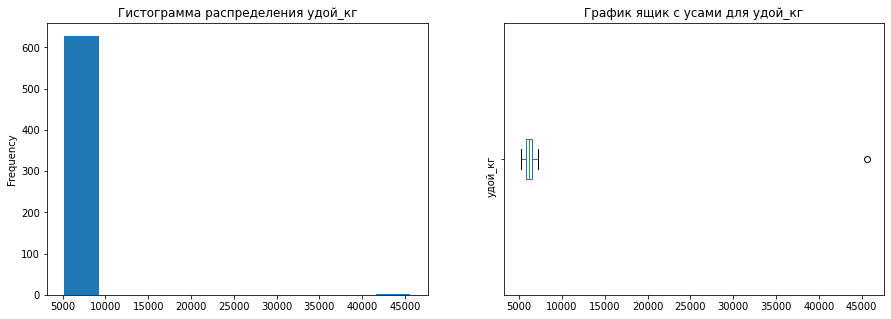

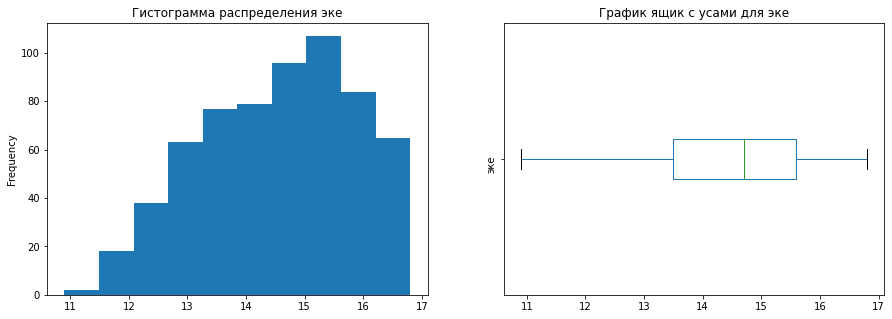

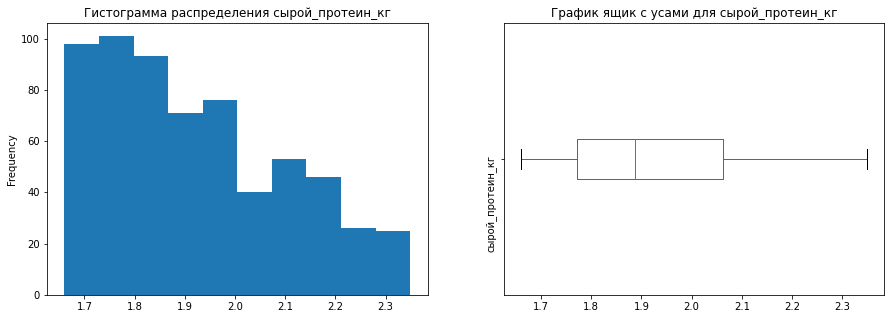

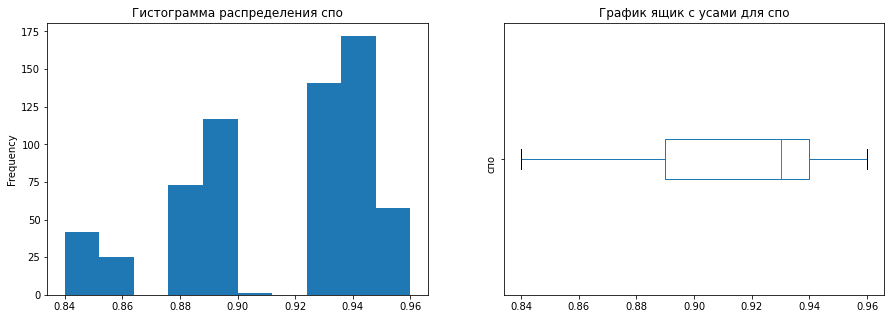

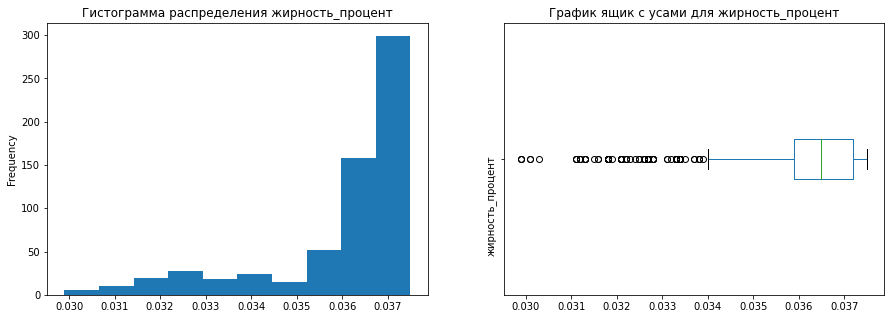

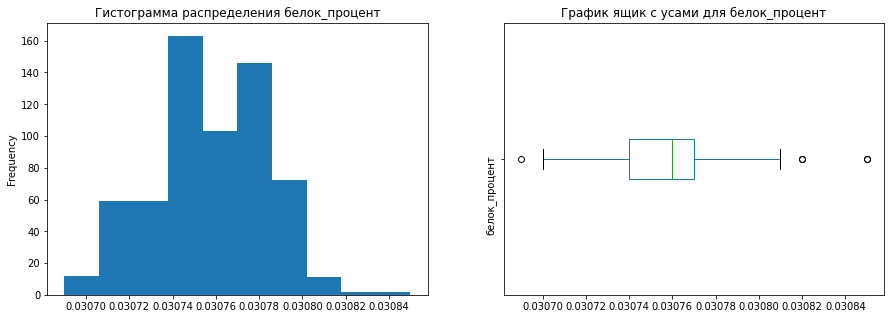

In [19]:
# Графики для количественных признаков
for i, o in df_main[['удой_кг', 'эке', 'сырой_протеин_кг', 'спо', 'жирность_процент', 'белок_процент']].items():
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    
    df_main[i].plot(kind='hist', ax=axes[0])
    axes[0].set_title(f'Гистограмма распределения {i}')

    df_main[i].plot(kind='box', vert=False, ax=axes[1], rot=90)
    axes[1].set_title(f'График ящик с усами для {i}')
    plt.show()

In [20]:
# Избавимся от выбросов
df_main.loc[df_main['удой_кг'] > 10000, 'удой_кг'] /= 10

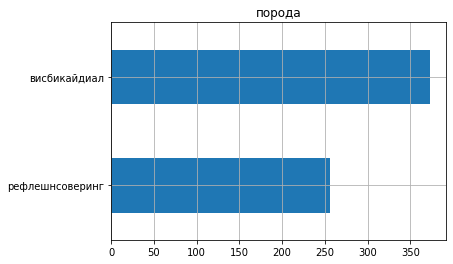

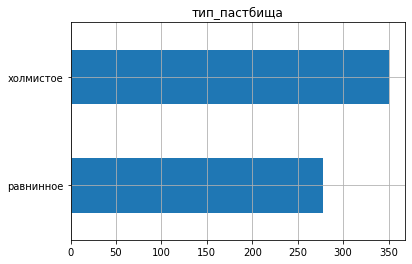

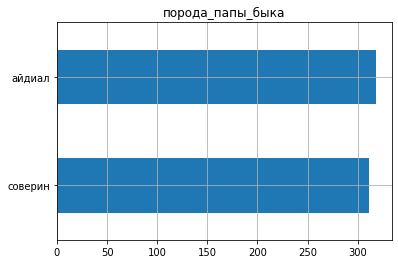

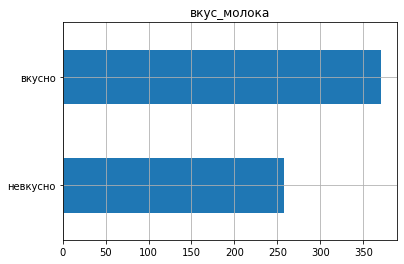

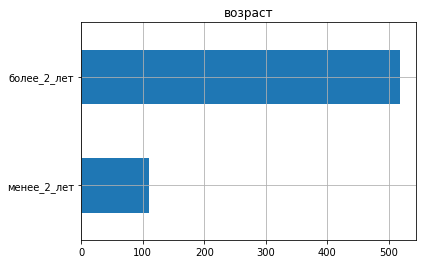

In [22]:
# Графики для категориальных признаков
for i, o in df_main[['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']].items():
    df_main[i].value_counts(ascending=True).plot(kind='barh', rot=0, grid=True)
    plt.title(i)
    plt.show()

***Вывод:***

Были выявлены аномалии в столбцах удой_кг, жирность_процент, белок_процент. В стаде в основном коровы возрастом более 2 лет

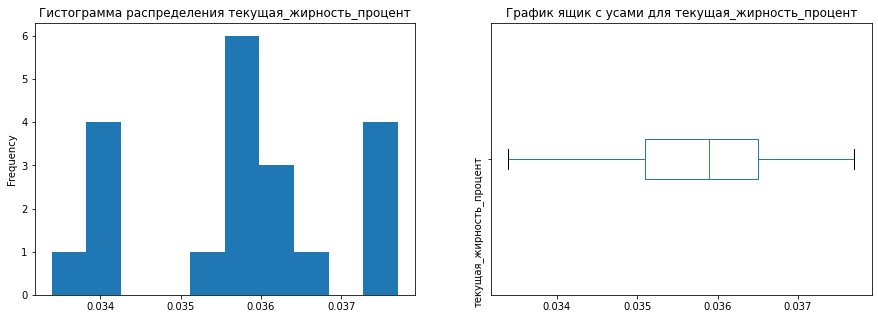

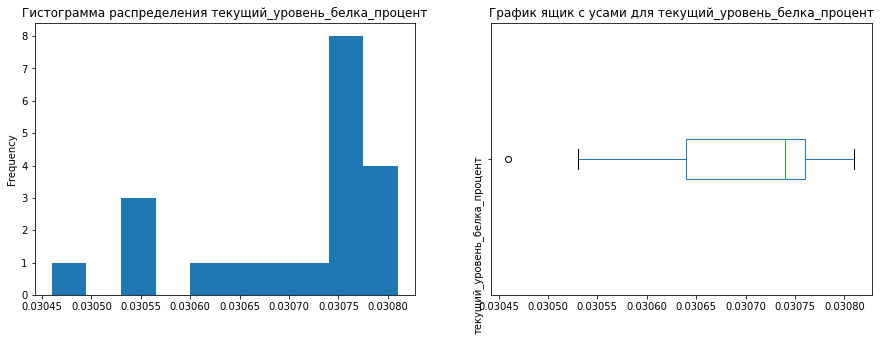

In [23]:
# данные о коровах «ЭкоФермы», для покупки
# Графики для количественных признаков

for i, o in df_buy[['текущая_жирность_процент', 'текущий_уровень_белка_процент']].items():
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    
    df_buy[i].plot(kind='hist', ax=axes[0])
    axes[0].set_title(f'Гистограмма распределения {i}')

    df_buy[i].plot(kind='box', vert=False, ax=axes[1], rot=90)
    axes[1].set_title(f'График ящик с усами для {i}')
    plt.show()

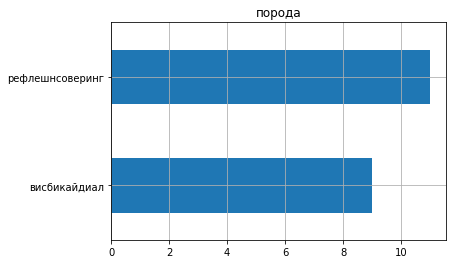

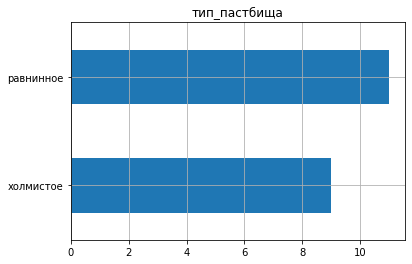

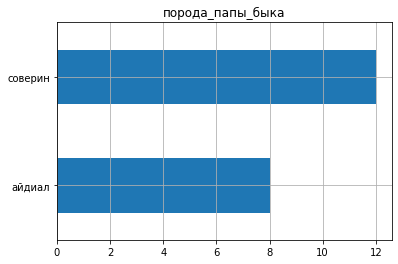

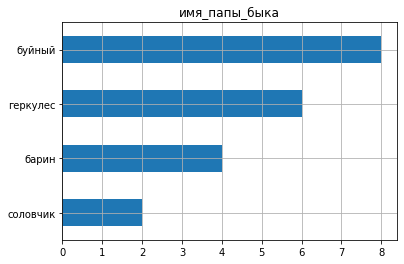

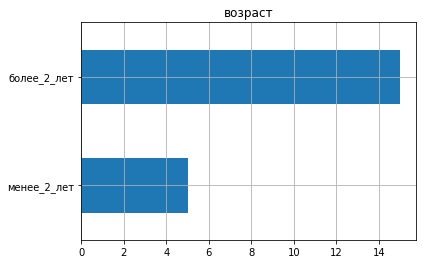

In [24]:
# Графики для количественных признаков

for i, o in df_buy[['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы_быка', 'возраст']].items():
    df_buy[i].value_counts(ascending=True).plot(kind='barh', rot=0, grid=True)
    plt.title(i)
    plt.show()

***Вывод:***

Наибольший процент жирности в процентах состовляет 3.4 и 3.8. Порода и тип пастбища представлены в равном количестве.

## Шаг 4. Корреляционный анализ

1. Изучите взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками.

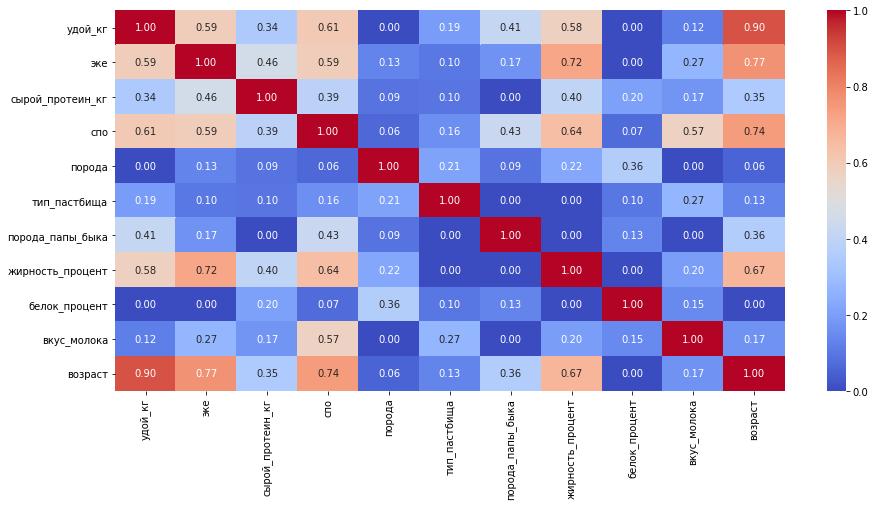

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(df_main.drop('id', 1).phik_matrix(
    interval_cols=['удой_кг', 'эке', 'сырой_протеин_кг', 'спо', 'жирность_процент', 'белок_процент']),
            annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

2. Постройте диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.

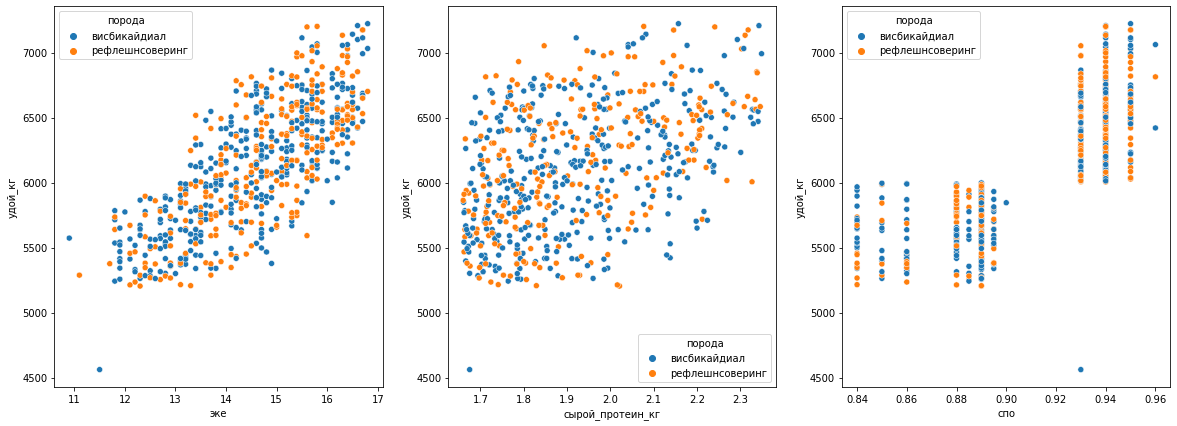

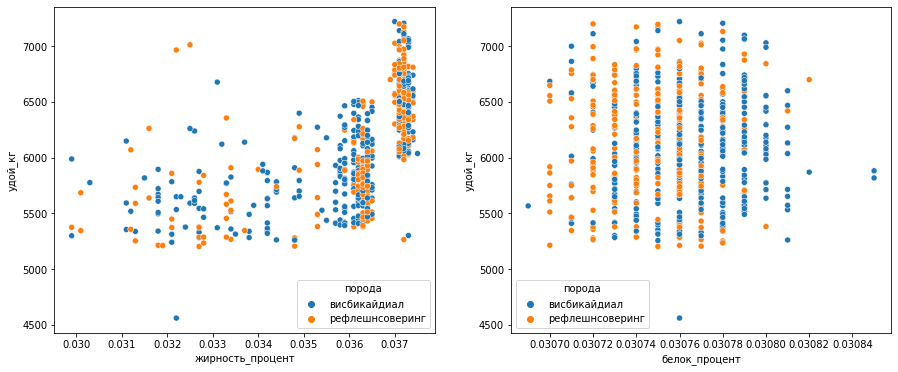

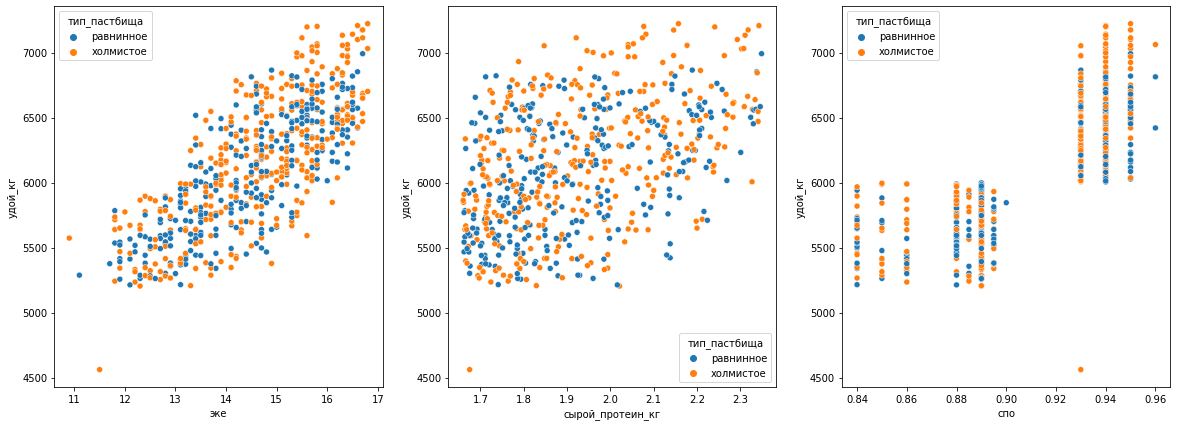

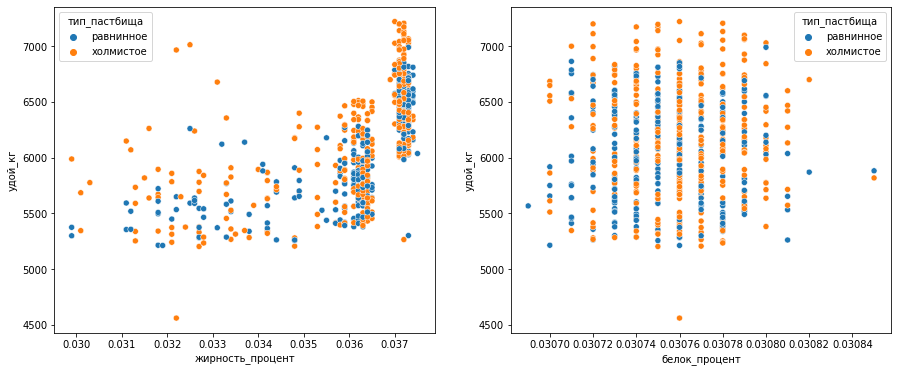

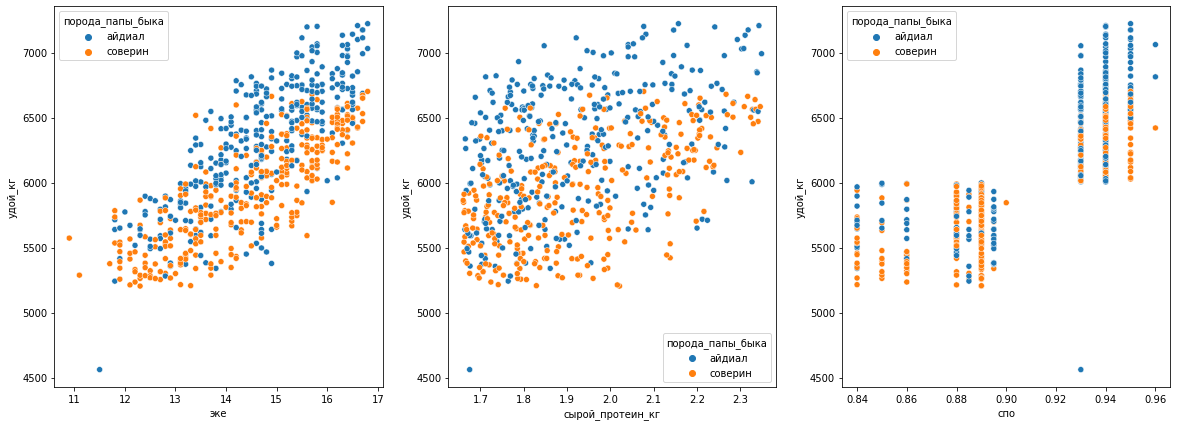

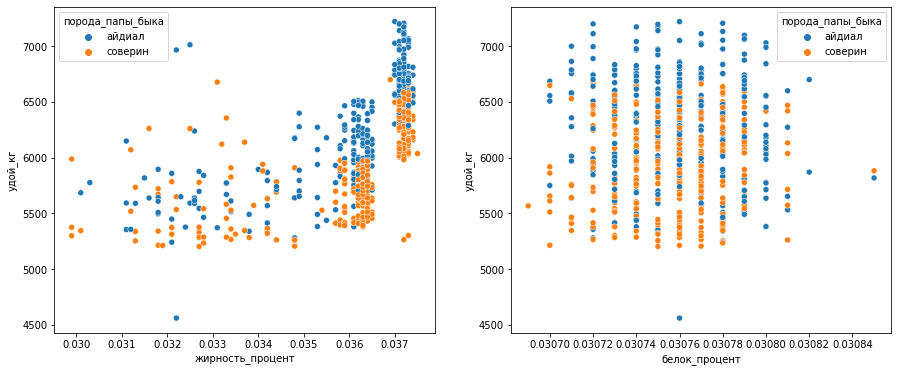

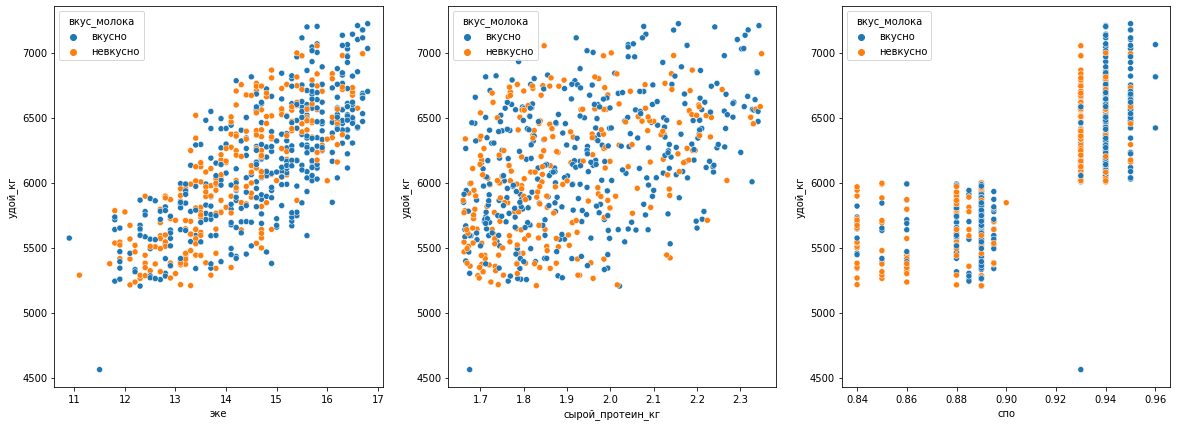

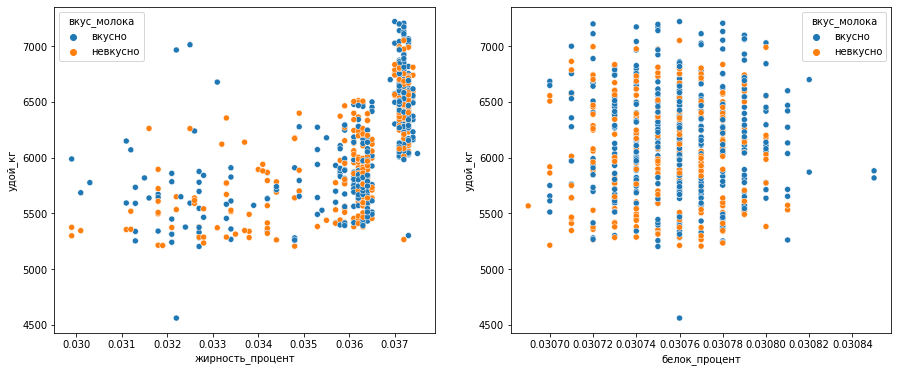

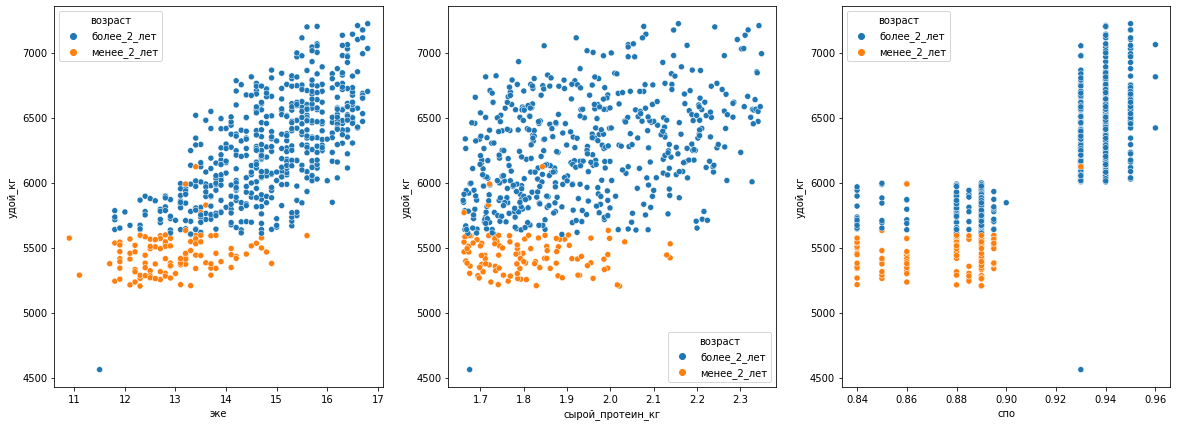

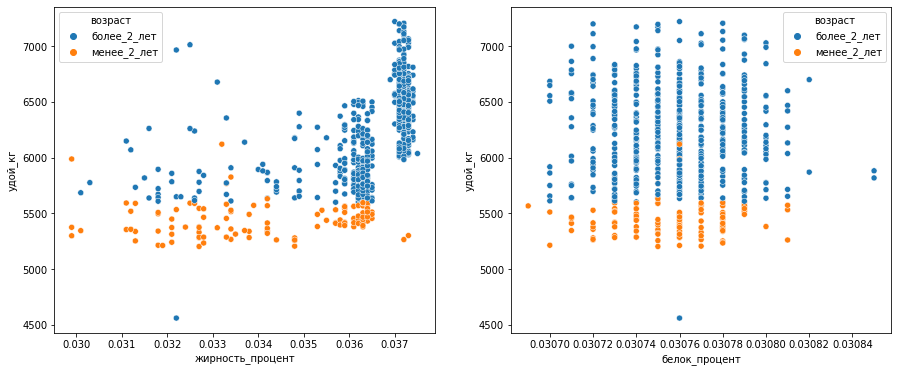

In [26]:
for j, o in df_main[['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']].items():
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
    sns.scatterplot(data=df_main, x='эке', y='удой_кг', hue=j, ax=axes[0])
    sns.scatterplot(data=df_main, x='сырой_протеин_кг', y='удой_кг', hue=j, ax=axes[1])
    sns.scatterplot(data=df_main, x='спо', y='удой_кг', hue=j, ax=axes[2])
    plt.show()
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    sns.scatterplot(data=df_main, x='жирность_процент', y='удой_кг', hue=j, ax=axes[0])
    sns.scatterplot(data=df_main, x='белок_процент', y='удой_кг', hue=j, ax=axes[1])
    plt.show()
    print(2 * '\n')   

***Вывод:***
- Порода в основном влияет на белок процент, рефлешнсоверинг в осномном имеет более низкий процент.
- Тип пастбища холмистое даёт наибольшее значение удоя в кг.
- Порода папы быка влияет на удой в кг., айдиал приносит наибольший удой.
- На вкус молока больше всего влияют эке, спо 
- Возраст сильно влияет на количество удоя в кг.
- Мультиколлинеарность отсутствует

## Шаг 5. Обучение модели линейной регрессии
Вам предстоит обучить три модели простой линейной регрессии.

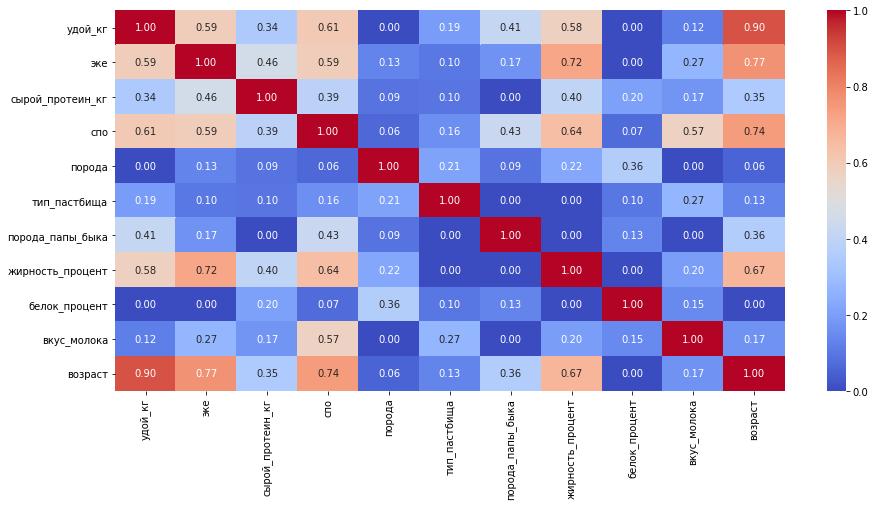

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(df_main.drop('id', 1).phik_matrix(
    interval_cols=['удой_кг', 'эке', 'сырой_протеин_кг', 'спо', 'жирность_процент', 'белок_процент']),
            annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [28]:
X = df_main.drop(['id', 'удой_кг'], 1)
y = df_main['удой_кг']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)
print(f'X_train{X_train.shape}, X_test{X_test.shape}')
print(f'y_train{y_train.shape}, y_test{y_test.shape}', '\n')
num_col_names = ['эке', 'сырой_протеин_кг', 'спо']

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']

# encoder, scaler
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], 1)
X_test = pd.concat([X_test_ohe, X_test_scaled], 1)

# model.fit()
model_lr1 = LinearRegression()
model_lr1.fit(X_train, y_train)
predictions1 = model_lr1.predict(X_test)

mse1 = mean_squared_error(y_test, predictions1)
rmse1 = root_mean_squared_error(y_test, predictions1)
mae1 = mean_absolute_error(y_test, predictions1)
r21 = r2_score(y_test, predictions1)

print(f'MSE LinearRegression = {mse1:.0f}')
print(f'RMSE LinearRegression = {rmse1:.0f}')
print(f'MAE LinearRegression = {mae1:.0f}')
print(f'R2 LinearRegression = {r21:.3f}')

X_train(471, 10), X_test(158, 10)
y_train(471,), y_test(158,) 

MSE LinearRegression = 41298
RMSE LinearRegression = 203
MAE LinearRegression = 159
R2 LinearRegression = 0.831


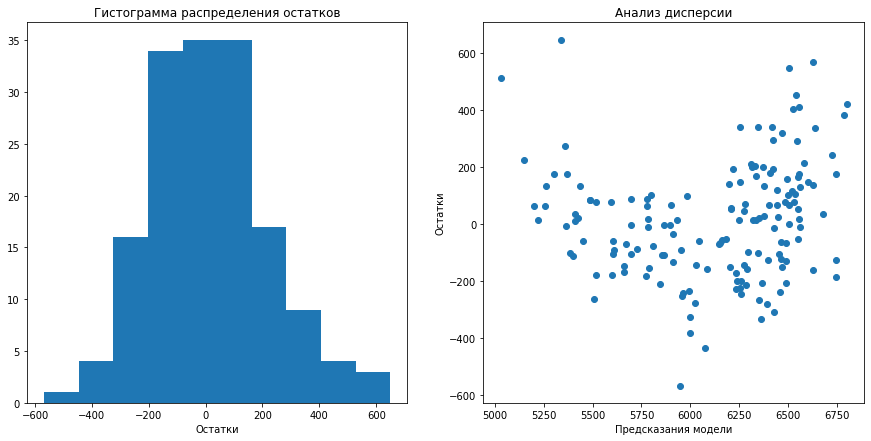

In [29]:
# Анализ остатков

residuals1 = y_test - predictions1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
axes[0].hist(residuals1)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions1, residuals1)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

***Вывод:***

Способность модели обобщать данные 83.1%, есть куда расти. Анализ остатков показал, что гистограмма нормально распределена, дисперсия в виде рупора, говорит о непостоянстве остатков с увеличенным разбросом в области 6000.

2. Подготовьте данные с учётом связи входных признаков с целевым и обучите на них вторую модель LinearRegression.

Посмотрите на диаграммы рассеяния: на них можно увидеть, что некоторые входные признаки связаны с целевым нелинейно. Исключите нелинейность, чтобы эти признаки были информативны для линейной регрессии. Вот несколько способов, которыми это можно сделать:

- Вы обнаружите, что СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуйте СПО в категориальный бинарный признак, использовав эту границу.

- Вы обнаружите, что ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.

In [30]:
df_main.loc[df_main['спо'] < 0.92, 'спо'] = 0
df_main.loc[df_main['спо'] > 0.92, 'спо'] = 1
df_main['эке'] = df_main['эке'] ** 2

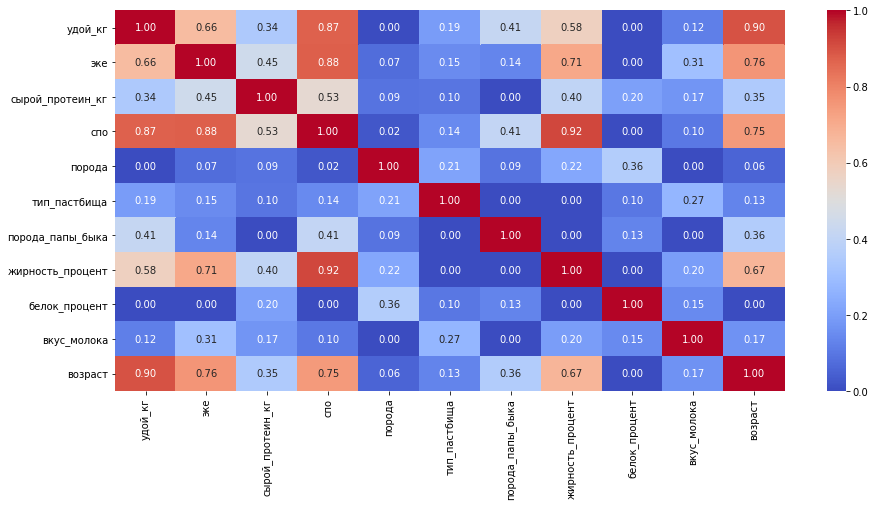

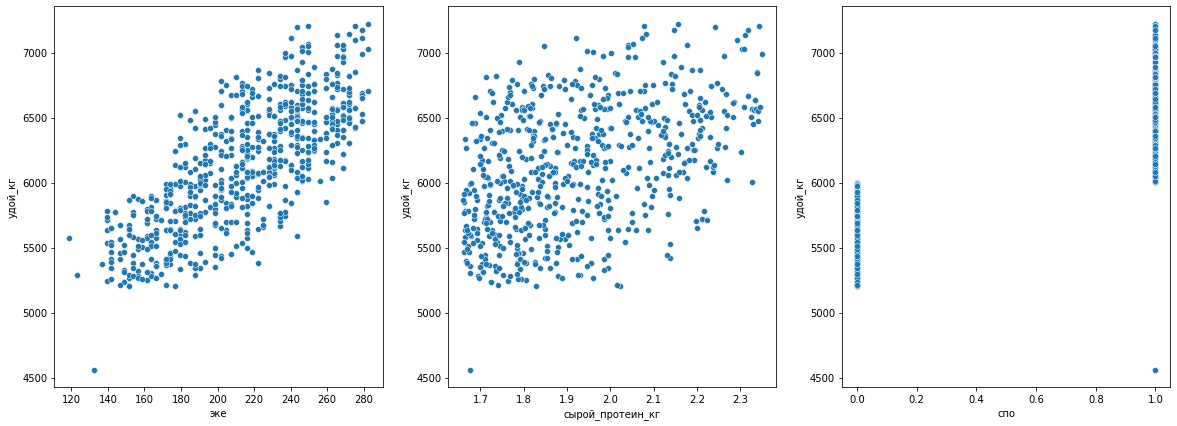

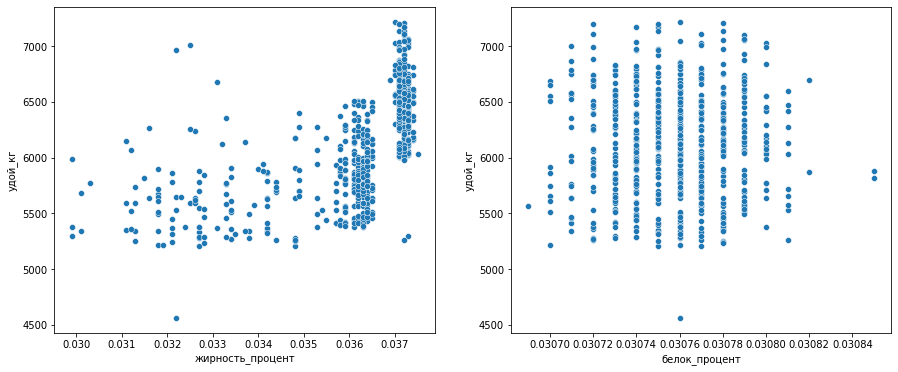

In [31]:
# Продублирую графики для удобства
plt.figure(figsize=(15,7))
sns.heatmap(df_main.drop('id', 1).phik_matrix(
    interval_cols=['удой_кг', 'эке', 'сырой_протеин_кг', 'спо', 'жирность_процент', 'белок_процент']),
            annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.scatterplot(data=df_main, x='эке', y='удой_кг', ax=axes[0])
sns.scatterplot(data=df_main, x='сырой_протеин_кг', y='удой_кг', ax=axes[1])
sns.scatterplot(data=df_main, x='спо', y='удой_кг', ax=axes[2])
plt.show()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.scatterplot(data=df_main, x='жирность_процент', y='удой_кг', ax=axes[0])
sns.scatterplot(data=df_main, x='белок_процент', y='удой_кг', ax=axes[1])
plt.show()

In [32]:
X = df_main.drop(['id', 'удой_кг'], 1)
y = df_main['удой_кг']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

print(f'X_train{X_train.shape}, X_test{X_test.shape}')
print(f'y_train{y_train.shape}, y_test{y_test.shape}', '\n')
num_col_names = ['эке', 'сырой_протеин_кг']

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо']

# encoder, scaler
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], 1)
X_test = pd.concat([X_test_ohe, X_test_scaled], 1)

# model.fit()
model_lr2 = LinearRegression()
model_lr2.fit(X_train, y_train)
predictions2 = model_lr2.predict(X_test)

mse2 = mean_squared_error(y_test, predictions2)
rmse2 = root_mean_squared_error(y_test, predictions2)
mae2 = mean_absolute_error(y_test, predictions2)
r22 = r2_score(y_test, predictions2)

print(f'MSE LinearRegression = {mse2:.0f}')
print(f'RMSE LinearRegression = {rmse2:.0f}')
print(f'MAE LinearRegression = {mae2:.0f}')
print(f'R2 LinearRegression = {r22:.3f}')

X_train(471, 10), X_test(158, 10)
y_train(471,), y_test(158,) 

MSE LinearRegression = 35748
RMSE LinearRegression = 189
MAE LinearRegression = 144
R2 LinearRegression = 0.854


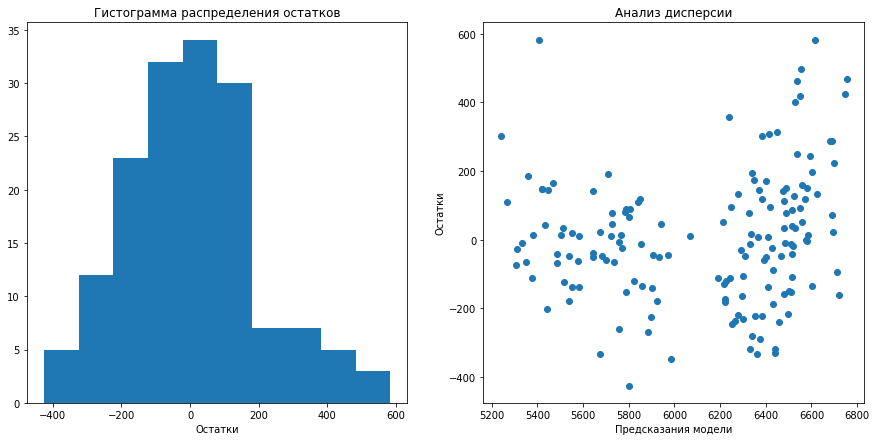

In [33]:
# Анализ остатков

residuals2 = y_test - predictions2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
axes[0].hist(residuals2)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions2, residuals2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

***Вывод:***

Увереность модели по метрики R2 увеличилась до 85.6%, на распределение остатков смещения нет. MSE, RMSE, MAE уменьшились тоже.

3. Добавьте в данные новый признак и обучите на них третью модель LinearRegression.

* Добавьте признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.

In [34]:
df_main = df_main.merge(df_dad, on='id')

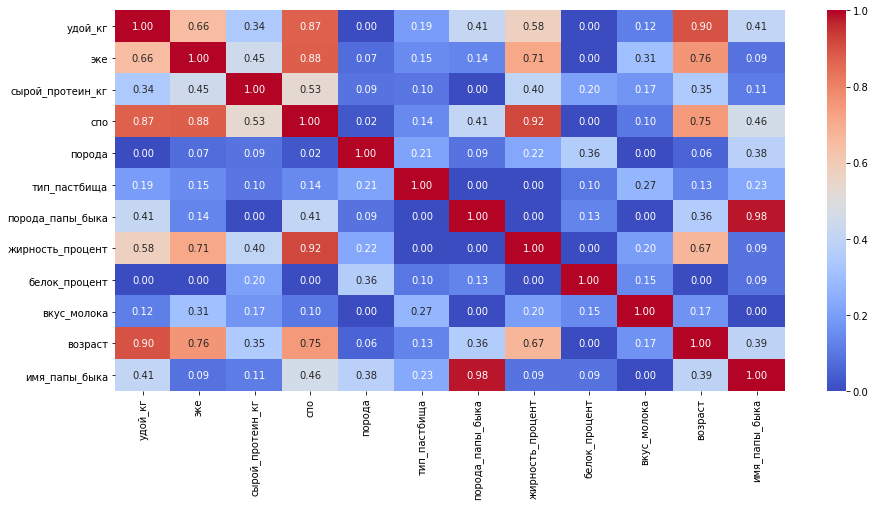

In [35]:
# Продублирую график для удобства
plt.figure(figsize=(15,7))
sns.heatmap(df_main.drop('id', 1).phik_matrix(
    interval_cols=['удой_кг', 'эке', 'сырой_протеин_кг', 'спо', 'жирность_процент', 'белок_процент']),
            annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


In [36]:
X = df_main.drop(['id', 'удой_кг'], 1)
y = df_main['удой_кг']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

print(f'X_train{X_train.shape}, X_test{X_test.shape}')
print(f'y_train{y_train.shape}, y_test{y_test.shape}', '\n')
num_col_names = ['эке', 'сырой_протеин_кг']
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо', 'имя_папы_быка']

# encoder, scaler
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], 1)
X_test = pd.concat([X_test_ohe, X_test_scaled], 1)

# model.fit()
model_lr3 = LinearRegression()
model_lr3.fit(X_train, y_train)
predictions3 = model_lr3.predict(X_test)

mse3 = mean_squared_error(y_test, predictions3)
rmse3 = root_mean_squared_error(y_test, predictions3)
mae3 = mean_absolute_error(y_test, predictions3)
r23 = r2_score(y_test, predictions3)

print(f'MSE LinearRegression = {mse3:.0f}')
print(f'RMSE LinearRegression = {rmse3:.0f}')
print(f'MAE LinearRegression = {mae3:.0f}')
print(f'R2 LinearRegression = {r23:.3f}')

X_train(471, 11), X_test(158, 11)
y_train(471,), y_test(158,) 

MSE LinearRegression = 32829
RMSE LinearRegression = 181
MAE LinearRegression = 140
R2 LinearRegression = 0.866


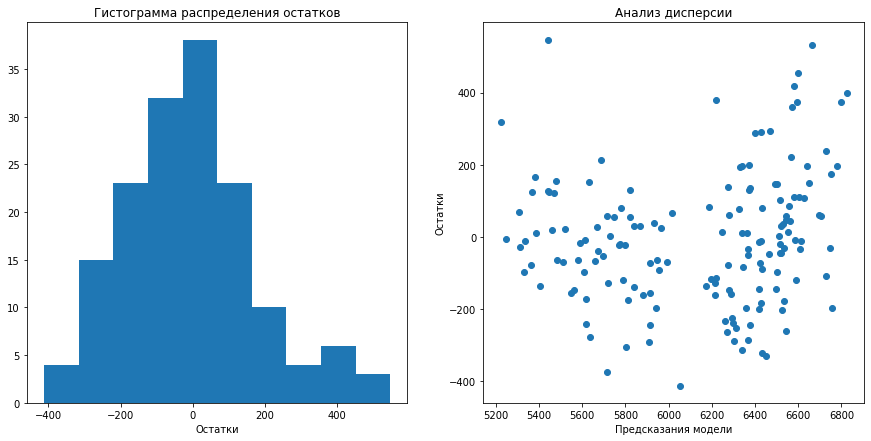

In [37]:
# Анализ остатков

residuals3 = y_test - predictions3

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
axes[0].hist(residuals3)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions3, residuals3)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

***Вывод:***

Увереность модели по метрике R2 увеличилась до 86.8%, на распределение остатков смещения нет. MSE, RMSE, MAE уменьшились тоже.

4. Сравните качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.
5. Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрик.
Выберите лучшую модель;
Укажите доверительный интервал прогноза лучшей модели. Для этого рассчитайте квантили ошибки модели на тренировочных данных.

In [38]:
print(f'Моедль 1: MSE = {mse1:.0f}; RMSE = {rmse1:.0f}; MAE = {mae1:.0f}; R2 = {r21:.3f}')
print(f'Моедль 2: MSE = {mse2:.0f}; RMSE = {rmse2:.0f}; MAE = {mae2:.0f}; R2 = {r22:.3f}')
print(f'Моедль 3: MSE = {mse3:.0f}; RMSE = {rmse3:.0f}; MAE = {mae3:.0f}; R2 = {r23:.3f}')

Моедль 1: MSE = 41298; RMSE = 203; MAE = 159; R2 = 0.831
Моедль 2: MSE = 35748; RMSE = 189; MAE = 144; R2 = 0.854
Моедль 3: MSE = 32829; RMSE = 181; MAE = 140; R2 = 0.866


In [39]:
print('90% доверительный интервал =', st.norm.interval(0.9, loc=predictions3.mean(), scale=st.sem(predictions3)))

90% доверительный интервал = (6077.251611634238, 6191.760908635044)


***Вывод:*** 

Наилучшая модель под номер 3, с наибольшим значением R2, и с наименьшими ошибками.

6. С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
* Добавьте недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмите из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%.
* Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
* Получите прогноз удоя коров.

In [40]:
df_buy['эке'] = df_main['эке'].mean()*1.05
df_buy['спо'] = df_main['спо'].mean()*1.05
df_buy['сырой_протеин_кг'] = df_main['сырой_протеин_кг'].mean()*1.05
df_buy.loc[df_buy['спо'] < 0.92, 'спо'] = 0
df_buy.loc[df_buy['спо'] > 0.92, 'спо'] = 1

# Иначе будет ошибка, тк все значения 0, то ohe не отработает
#df_buy.loc[0,'спо'] = 1


In [41]:
num_col_names = ['эке', 'сырой_протеин_кг']

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо', 'имя_папы_быка']


buy_scaled = scaler.transform(df_buy[num_col_names])
buy_ohe = encoder.transform(df_buy[cat_col_names])
encoder_buy_col_names = encoder.get_feature_names_out()

X_test_ohe = pd.DataFrame(buy_ohe, columns=encoder_buy_col_names)
X_test_scaled = pd.DataFrame(buy_scaled, columns=num_col_names)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)


#pred
predictions4 = model_lr3.predict(X_test)
print(predictions4)
print()
print(f'Среднее значение удоя {np.mean(predictions4)}, медианное значение удоя {np.median(predictions4)}')
print(f'Количество коров с удоемм больше 6000 = {(predictions4 > 6000).sum()}')

[6184.65632793 5919.61340682 5923.94686263 6178.20023949 6149.79526443
 5992.4640069  6184.65632793 6135.44396461 5923.94686263 5962.3696817
 5950.85843902 6208.29456469 6184.65632793 5703.32402408 5923.94686263
 6178.20023949 5950.85843902 5992.4640069  6135.44396461 6149.79526443]

Среднее значение удоя 6046.646753894289, медианное значение удоя 6063.953985756336
Количество коров с удоемм больше 6000 = 10


***Вывод:***

По прогнозу 10 коров будут приносить удой больше 6000кг. в год.

## Шаг 6. Обучение модели логистической регрессии

1. Подготовьте данные датасета ferma_main.csv и обучите на них модель LogisticRegression.

* Используйте в качестве целевого признак Вкус молока.
* При необходимости преобразуйте имеющиеся или добавьте новые признаки.
* Разбейте данные на тренировочную и тестовую выборки.
* Кодируйте категориальные признаки с помощью OneHotEncoder.
* Масштабируйте количественные признаки с помощью StandardScaler.
* Обучите модель логистической регрессии на подготовленных данных.
* Оцените качество модели на тестовой выборке: рассчитайте метрики accuracy, recall, precision.
* Постройте матрицу ошибок.

In [42]:
print(df_main['вкус_молока'].head())
le = LabelEncoder()
df_main['вкус_молока'] = 1 - le.fit_transform(df_main['вкус_молока'])
print(df_main['вкус_молока'].head())

0      вкусно
1      вкусно
2    невкусно
3    невкусно
4      вкусно
Name: вкус_молока, dtype: object
0    1
1    1
2    0
3    0
4    1
Name: вкус_молока, dtype: int64


In [43]:
#df_main['вкус_молока'] = df_main['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)
#df_main['вкус_молока']

X_train(471, 11), X_test(158, 11)
y_train(471,), y_test(158,) 

Accuracy = 0.614
Recall = 0.859
Precision = 0.598


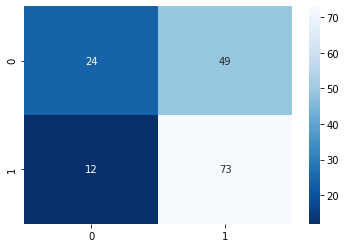

In [44]:
X = df_main.drop(['id', 'вкус_молока'], 1)
y = df_main['вкус_молока']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

print(f'X_train{X_train.shape}, X_test{X_test.shape}')
print(f'y_train{y_train.shape}, y_test{y_test.shape}', '\n')
num_col_names = ['удой_кг', 'эке', 'сырой_протеин_кг']
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо', 'имя_папы_быка']


# encoder, scaler
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], 1)
X_test = pd.concat([X_test_ohe, X_test_scaled], 1)

# model.fit()
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Accuracy = {round(accuracy ,3)}')
print(f'Recall = {round(recall ,3)}')
print(f'Precision = {round(precision ,3)}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

***Вывод:***

Модель совершает ошибки FN реже, чем FP, то есть эффективнее избегает ошибки второго типа.

**Критичнее будет купить корову с невкусным молоком, тем самым нужно избежать ошибку первого рода**

In [45]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
                    columns = ['y_valid', 'y_proba']).sort_values('y_proba', ascending=False)

print(data.head()) 

    y_valid   y_proba
53        1  0.889633
36        1  0.825265
43        1  0.821140
83        1  0.817453
35        1  0.813168


In [46]:
thresholds = [round(i,2) for i in np.linspace(0.6,0.89,num = 29,endpoint=False)]
print(thresholds) 

[0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88]


In [47]:
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x : 0 if x < i else 1)

In [48]:
porog = []
porog = pd.DataFrame(columns=['thresholds', 'Precision'])

rw = 0
for i in data.columns[2:]:
    precision = precision_score(data['y_valid'],data[i])
    porog.loc[rw] = [i, precision]
    rw = rw+1
porog

,thresholds,Precision
0,y_pred_0.6,0.688172
1,y_pred_0.61,0.688172
2,y_pred_0.62,0.689655
3,y_pred_0.63,0.690476
4,y_pred_0.64,0.692308
5,y_pred_0.65,0.728571
6,y_pred_0.66,0.750000
7,y_pred_0.67,0.779661
8,y_pred_0.68,0.796296
9,y_pred_0.69,0.803922


***Вывод:***

Наилучший порог 0.76., минимизирующий ошибку 1 рода.

3. С помощью обученной модели спрогнозируйте вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
* Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
* Получите прогноз вкуса молока коров.

In [49]:
df_buy['удой_кг'] = predictions4.astype(int)
cow_buy = df_buy 
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы_быка,текущая_жирность_процент,текущий_уровень_белка_процент,возраст,эке,спо,сырой_протеин_кг,удой_кг
0,висбикайдиал,холмистое,айдиал,геркулес,0.0358,0.03076,более_2_лет,223.889831,0.0,2.019532,6184
1,висбикайдиал,равнинное,соверин,буйный,0.0354,0.03081,менее_2_лет,223.889831,0.0,2.019532,5919
2,рефлешнсоверинг,равнинное,соверин,барин,0.0359,0.03074,более_2_лет,223.889831,0.0,2.019532,5923
3,рефлешнсоверинг,холмистое,айдиал,буйный,0.0340,0.03061,более_2_лет,223.889831,0.0,2.019532,6178
4,рефлешнсоверинг,равнинное,айдиал,буйный,0.0364,0.03074,более_2_лет,223.889831,0.0,2.019532,6149
5,рефлешнсоверинг,равнинное,соверин,геркулес,0.0363,0.03053,менее_2_лет,223.889831,0.0,2.019532,5992
6,висбикайдиал,холмистое,айдиал,геркулес,0.0358,0.03076,более_2_лет,223.889831,0.0,2.019532,6184
7,висбикайдиал,равнинное,соверин,буйный,0.0357,0.03079,более_2_лет,223.889831,0.0,2.019532,6135
8,рефлешнсоверинг,равнинное,соверин,барин,0.0359,0.03074,более_2_лет,223.889831,0.0,2.019532,5923
9,рефлешнсоверинг,холмистое,айдиал,буйный,0.0340,0.03079,менее_2_лет,223.889831,0.0,2.019532,5962


In [50]:
RANDOM_STATE = 7

num_col_names = ['удой_кг', 'эке', 'сырой_протеин_кг']
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо', 'имя_папы_быка']

# encoder, scaler

cow_buy_ohe = encoder.transform(cow_buy[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()


cow_buy_scaled = scaler.transform(cow_buy[num_col_names])

# DataFrame
X_test_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)

X_test_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)

X_test = pd.concat([X_test_ohe, X_test_scaled], 1)
X_test


,порода_рефлешнсоверинг,тип_пастбища_холмистое,порода_папы_быка_соверин,возраст_менее_2_лет,спо_1.0,имя_папы_быка_буйный,имя_папы_быка_геркулес,имя_папы_быка_соловчик,удой_кг,эке,сырой_протеин_кг
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.131251,0.306411,0.5478
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.427875,0.306411,0.5478
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.419436,0.306411,0.5478
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.118591,0.306411,0.5478
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.057404,0.306411,0.5478
5,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.273852,0.306411,0.5478
6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.131251,0.306411,0.5478
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.027865,0.306411,0.5478
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.419436,0.306411,0.5478
9,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.337149,0.306411,0.5478


In [55]:
taste = clf.predict_proba(X_test)[:,1] > 0.76
taste = pd.Series(taste)
taste.value_counts()

True     11
False     9
dtype: int64

In [56]:
df_buy = df_buy.reset_index(drop=True)

In [57]:
df_buy['вкус_молока'] = taste.apply(lambda x: 'вкусно' if x == True  else 'невкусно')
df_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы_быка,текущая_жирность_процент,текущий_уровень_белка_процент,возраст,эке,спо,сырой_протеин_кг,удой_кг,вкус_молока
0,висбикайдиал,холмистое,айдиал,геркулес,0.0358,0.03076,более_2_лет,223.889831,0.0,2.019532,6184,вкусно
1,висбикайдиал,равнинное,соверин,буйный,0.0354,0.03081,менее_2_лет,223.889831,0.0,2.019532,5919,невкусно
2,рефлешнсоверинг,равнинное,соверин,барин,0.0359,0.03074,более_2_лет,223.889831,0.0,2.019532,5923,невкусно
3,рефлешнсоверинг,холмистое,айдиал,буйный,0.0340,0.03061,более_2_лет,223.889831,0.0,2.019532,6178,вкусно
4,рефлешнсоверинг,равнинное,айдиал,буйный,0.0364,0.03074,более_2_лет,223.889831,0.0,2.019532,6149,невкусно
5,рефлешнсоверинг,равнинное,соверин,геркулес,0.0363,0.03053,менее_2_лет,223.889831,0.0,2.019532,5992,невкусно
6,висбикайдиал,холмистое,айдиал,геркулес,0.0358,0.03076,более_2_лет,223.889831,0.0,2.019532,6184,вкусно
7,висбикайдиал,равнинное,соверин,буйный,0.0357,0.03079,более_2_лет,223.889831,0.0,2.019532,6135,вкусно
8,рефлешнсоверинг,равнинное,соверин,барин,0.0359,0.03074,более_2_лет,223.889831,0.0,2.019532,5923,невкусно
9,рефлешнсоверинг,холмистое,айдиал,буйный,0.0340,0.03079,менее_2_лет,223.889831,0.0,2.019532,5962,вкусно


In [58]:
df_buy.query('вкус_молока == "вкусно" & удой_кг > 6000')

,порода,тип_пастбища,порода_папы_быка,имя_папы_быка,текущая_жирность_процент,текущий_уровень_белка_процент,возраст,эке,спо,сырой_протеин_кг,удой_кг,вкус_молока
0,висбикайдиал,холмистое,айдиал,геркулес,0.0358,0.03076,более_2_лет,223.889831,0.0,2.019532,6184,вкусно
3,рефлешнсоверинг,холмистое,айдиал,буйный,0.0340,0.03061,более_2_лет,223.889831,0.0,2.019532,6178,вкусно
6,висбикайдиал,холмистое,айдиал,геркулес,0.0358,0.03076,более_2_лет,223.889831,0.0,2.019532,6184,вкусно
7,висбикайдиал,равнинное,соверин,буйный,0.0357,0.03079,более_2_лет,223.889831,0.0,2.019532,6135,вкусно
12,висбикайдиал,холмистое,айдиал,геркулес,0.0368,0.03046,более_2_лет,223.889831,0.0,2.019532,6184,вкусно
15,рефлешнсоверинг,холмистое,айдиал,буйный,0.0340,0.03065,более_2_лет,223.889831,0.0,2.019532,6178,вкусно
18,висбикайдиал,равнинное,соверин,буйный,0.0334,0.03069,более_2_лет,223.889831,0.0,2.019532,6135,вкусно


***Вывод:***

С учётом предсказания модели 7 коровы дадут вкусное молоко

## Заключение

В ходе проведённой работы было выявлено следующее:

**Предобработка данных**

* В файле `ferma_main.csv` содержались данные несоответствующих типов данных, а также были обнаружены явные и неявные дубликаты.
* В файле `ferma_dad.csv` проблем обнаружено небыло
* В файле `cow_buy.csv` содержались данные несоответствующих типов данных, а также были обнаружены и устранены дубликаты.

**Исследовательский анализ данных**
  
* В данных медианные значения жирности и белка чуть больше 3%, среднее значение СПО 0.91, среднее значение ЭКЕ 14.5. В наибольшем количестве представлены порода висбикайдиал, тип пастбища холмистое, и возраст более 2 лет.
* Порода папы быка влияет на удой в кг., айдиал приносит наибольший удой.
* На вкус молока больше всего влияют эке, спо
* Возраст сильно влияет на количество удоя в кг.
* Мультиколлинеарность в признаках отсутствует

**Обучение и тестирование модели линейной регресии**
* Численные даныне были отмасштабированы, категориальные данные были закодированы
* В результате обучение трёх моделей наилучшей стала третья с результатами RMSE=181, R2=0.86

**Обучение и тестирование модели логистической регрессии**
* Модель совершает ошибки FN реже, чем FP, критичнее будет купить корову с невкусным молоком, тем самым нужно избежать ошибку первого рода
* Для избежания ошибок первого рода был выбран порог классификации равный 0.76
С учётом прогнозных значений моделей регресии и классификации для покупки подойдёт 9 коров.
